In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve 
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier



In [2]:
data = pd.read_feather('finalData.ft')


In [3]:
columns=data.columns
labels=data['Treatment']
data = data.drop(('Treatment'),axis=1)
data = data.to_numpy()

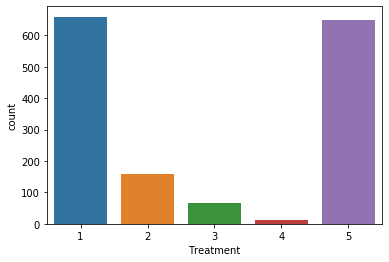

In [4]:
sns.countplot(labels)

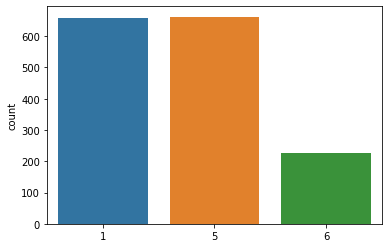

In [5]:
labels=list(labels)
for c in range(0,len(labels),1):
    if(labels[c]==2 or labels[c]==3):
        labels[c] = 6
    elif(labels[c]==4):
        labels[c]=5
sns.countplot(labels)

In [6]:
trainData, testData, trainLabels, testLabels = train_test_split(data,labels,test_size=0.15,stratify=labels)

Text(0, 0.5, 'Count')

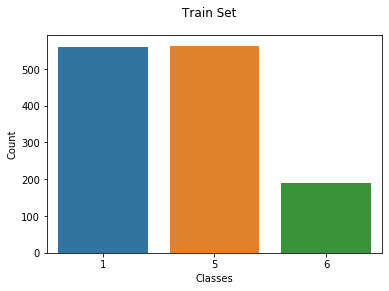

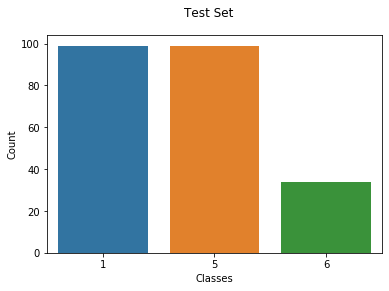

In [7]:
data=trainData.copy()
labels=trainLabels.copy()

figure=plt.figure(1)
sns.countplot(labels)
plt.suptitle('Train Set')
plt.xlabel('Classes')
plt.ylabel('Count')

figure=plt.figure(2)
sns.countplot(testLabels)
plt.suptitle('Test Set')
plt.xlabel('Classes')
plt.ylabel('Count')



In [8]:
folds= KFold(n_splits=4, shuffle=True)
accuracies=[]
labels=np.asarray(labels)
for (train_index, test_index) in tqdm(folds.split(data,labels)):
    xtrain , ytrain = data[train_index.astype(int)] , labels[train_index.astype(int)]
    xtest , ytest = data[test_index.astype(int)] , labels[test_index.astype(int)]
    
    classifier = DecisionTreeClassifier()
    classifier.fit(xtrain , ytrain)
    predicted = classifier.predict(xtest)
    accuracy = accuracy_score(ytest,predicted)
    print(confusion_matrix(ytest,predicted))
    accuracies.append(accuracy)
    print(accuracy)
    
print(sum(accuracies)/len(accuracies))

0it [00:00, ?it/s]

[[58 57 20]
 [61 62 30]
 [17 15  9]]
0.39209726443769
[[60 60 19]
 [61 60 22]
 [28 13  6]]
0.3829787234042553
[[55 63 29]
 [47 64 15]
 [16 28 11]]
0.39634146341463417
[[66 55 18]
 [48 73 20]
 [16 24  8]]
0.4481707317073171


4it [00:00, 74.24it/s]


0.4048970457409742


In [9]:
folds= KFold(n_splits=4, shuffle=True)
accuracies=[]
labels=np.asarray(labels)
for (train_index, test_index) in tqdm(folds.split(data,labels)):
    xtrain , ytrain = data[train_index.astype(int)] , labels[train_index.astype(int)]
    xtest , ytest = data[test_index.astype(int)] , labels[test_index.astype(int)]
    
    classifier = lgb.LGBMClassifier(boosting_type='gbdt')
    classifier.fit(xtrain , ytrain)
    predicted = classifier.predict(xtest)
    accuracy = accuracy_score(ytest,predicted)
    print(confusion_matrix(ytest,predicted))
    accuracies.append(accuracy)
    print(accuracy)
    
print(sum(accuracies)/len(accuracies))

0it [00:00, ?it/s]

[[66 63  4]
 [60 78  4]
 [21 28  5]]
0.45288753799392095


1it [00:00,  3.48it/s]

[[60 67 10]
 [53 84  9]
 [21 22  3]]
0.44680851063829785


2it [00:00,  3.45it/s]

[[71 75  7]
 [52 72  5]
 [15 29  2]]
0.4420731707317073


3it [00:00,  3.50it/s]

[[80 52  5]
 [66 70 10]
 [29 13  3]]
0.46646341463414637


4it [00:01,  3.55it/s]


0.45205815849951814


In [10]:
labels6=labels.copy()
for c in range(0,len(labels6),1):
    if(labels6[c]==6):
        labels6[c]=1
    else:
        labels6[c]=0

folds= KFold(n_splits=4, shuffle=True)
accuracies=[]
labels6=np.asarray(labels6)
bestClassifier6=lgb.LGBMClassifier(boosting_type='gbdt')
bestScore=0
for (train_index, test_index) in tqdm(folds.split(data,labels6)):
    xtrain , ytrain = data[train_index.astype(int)] , labels6[train_index.astype(int)]
    xtest , ytest = data[test_index.astype(int)] , labels6[test_index.astype(int)]
    
    classifier6 = lgb.LGBMClassifier(boosting_type='gbdt')
    classifier6.fit(xtrain , ytrain)
    proba = classifier6.predict_proba(xtest)
    predicted=(classifier6.predict_proba(xtest)[:,1] >= 0.07).astype(bool)
    accuracy = accuracy_score(ytest,predicted)
    if(accuracy>bestScore):
        bestScore=accuracy
        bestClassifier6=classifier6
    print(confusion_matrix(ytest,predicted))
    accuracies.append(accuracy)
    print(accuracy)
    
print(sum(accuracies)/len(accuracies))

0it [00:00, ?it/s]

[[213  67]
 [ 37  12]]
0.6838905775075987


1it [00:00,  7.63it/s]

[[197  89]
 [ 27  16]]
0.6474164133738601


2it [00:00,  8.00it/s]

[[205  73]
 [ 34  16]]
0.6737804878048781


3it [00:00,  8.28it/s]

[[208  71]
 [ 28  21]]
0.698170731707317


4it [00:00,  8.25it/s]


0.6758145525984135


In [11]:
data15=[]
labels15=[]
for c in range(0,len(labels),1):
    label=labels[c]
    if(label==1):
        data15.append(data[c])
        labels15.append(1)
    elif(label==5):
        data15.append(data[c])
        labels15.append(0)

folds= KFold(n_splits=4, shuffle=True)
accuracies=[]
labels15=np.asarray(labels15)
data15=np.asarray(data15)
bestClassifier15=lgb.LGBMClassifier(boosting_type='gbdt')
bestScore=0
for (train_index, test_index) in tqdm(folds.split(data15,labels15)):
    xtrain , ytrain = data15[train_index.astype(int)] , labels15[train_index.astype(int)]
    xtest , ytest = data15[test_index.astype(int)] , labels15[test_index.astype(int)]
    
    classifier15 = lgb.LGBMClassifier(boosting_type='gbdt')
    classifier15.fit(xtrain , ytrain)
    predicted = classifier15.predict(xtest)
    accuracy = accuracy_score(ytest,predicted)
    if(accuracy>bestScore):
        bestScore=accuracy
        bestClassifier15=classifier15
    print(confusion_matrix(ytest,predicted))
    accuracies.append(accuracy)
    print(accuracy)
    
print(sum(accuracies)/len(accuracies))
        
        

0it [00:00, ?it/s]

[[75 68]
 [63 75]]
0.5338078291814946


1it [00:00,  9.09it/s]

[[78 55]
 [61 87]]
0.5871886120996441


2it [00:00,  9.32it/s]

[[88 65]
 [51 77]]
0.5871886120996441


3it [00:00,  9.49it/s]

[[74 60]
 [67 79]]
0.5464285714285714


4it [00:00,  9.66it/s]


0.5636534062023385


In [12]:
class6prob=[]
class15prob=[]
l1=[]
l2=[]
for record in data:
    prob6=bestClassifier6.predict_proba(record.reshape(1,-1))[:,1]
    class6prob.append(prob6)
    l1.append(1-prob6)
    prob15=bestClassifier15.predict_proba(record.reshape(1,-1))[:,1]
    class15prob.append(prob15)
    l2.append(1-prob15)



In [13]:

bias=[1]*len(data)
table = np.column_stack((bias,class6prob,class15prob,l1,l2))
tableLabels=labels.copy()
for c in range(0,len(tableLabels),1):
    if(tableLabels[c]==6):
        tableLabels[c]=-1
    elif(tableLabels[c]==5):
        tableLabels[c]=1
    else:
        tableLabels[c]=0
accuracies=[]

bestClassifier=MLPClassifier()
bestScore=0

for (train_index, test_index) in tqdm(folds.split(table,tableLabels)):
    xtrain , ytrain = table[train_index.astype(int)] , tableLabels[train_index.astype(int)]
    xtest , ytest = table[test_index.astype(int)] , tableLabels[test_index.astype(int)]
    
    classifier = MLPClassifier((5,3,3),activation='tanh',max_iter=1000,learning_rate='adaptive')
    classifier.fit(xtrain , ytrain)
    predicted = classifier.predict(xtest)
    accuracy = accuracy_score(ytest,predicted)
    if(accuracy>bestScore):
        bestScore=accuracy
        bestClassifier=classifier
    print(confusion_matrix(ytest,predicted))
    accuracies.append(accuracy)
    print(accuracy)
    
print(sum(accuracies)/len(accuracies))



0it [00:00, ?it/s]

[[ 36   6   4]
 [  1 121  18]
 [  2  14 127]]
0.8632218844984803


1it [00:02,  2.07s/it]

[[ 40   5   6]
 [  0 117  19]
 [  1  14 127]]
0.8632218844984803


2it [00:04,  2.08s/it]

[[ 29   5  11]
 [  0 139  11]
 [  0   9 124]]
0.8902439024390244


3it [00:06,  2.19s/it]

[[ 40   7   2]
 [  3 122   9]
 [  0  25 120]]
0.8597560975609756


4it [00:08,  2.14s/it]


0.8691109422492401


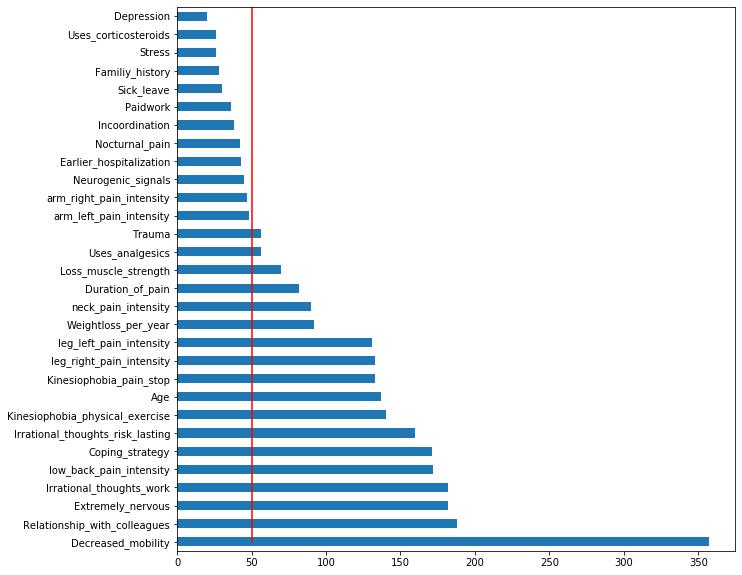

In [31]:
t=columns.copy()
t=list(t)
t.remove('Treatment')
feat_imp6 = pd.Series(classifier6.feature_importances_, index=t)
feat_imp6.nlargest(30).plot(kind='barh', figsize=(10,10))
x=[50]*50
plt.plot(x,np.linspace(0,100),color='red')

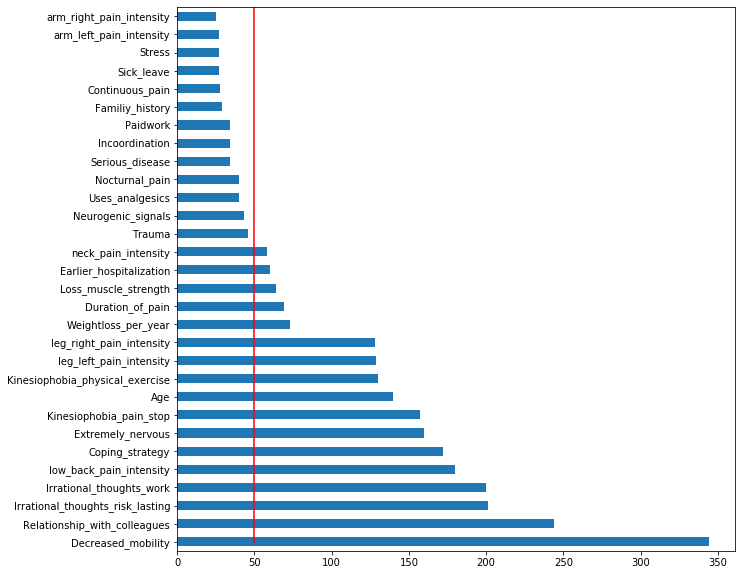

In [30]:
t=columns.copy()
t=list(t)
t.remove('Treatment')
feat_imp15 = pd.Series(classifier15.feature_importances_, index=t)
feat_imp15.nlargest(30).plot(kind='barh', figsize=(10,10))
plt.plot(x,np.linspace(0,100),color='red')

In [34]:
l1=[]
for val in feat_imp15:
    if(val>=50):
        l1.append(1)
    else:
        l1.append(0)

l2=[]
for val in feat_imp6:
    if(val>=50):
        l2.append(1)
    else:
        l2.append(0)
    
impQuestions=[]
for c in range(0,len(t),1):
    if(l1[c]==1 or l2[c]==1):
        impQuestions.append(t[c])
print(impQuestions)
        

['Duration_of_pain', 'Earlier_hospitalization', 'Extremely_nervous', 'Relationship_with_colleagues', 'Irrational_thoughts_risk_lasting', 'Irrational_thoughts_work', 'Coping_strategy', 'Kinesiophobia_physical_exercise', 'Kinesiophobia_pain_stop', 'Age', 'Uses_analgesics', 'Decreased_mobility', 'Weightloss_per_year', 'Loss_muscle_strength', 'Trauma', 'neck_pain_intensity', 'low_back_pain_intensity', 'leg_left_pain_intensity', 'leg_right_pain_intensity']


In [16]:
def testModel(x,y):
    predicted=[]
    ind0=[]
    ind1=[]
    ind2=[]
    ind3=[]
    for record in x:
        temp=bestClassifier6.predict_proba(record.reshape(1,-1))[:,1]
        ind0.append(temp)
        ind1.append(1-temp)
        temp=bestClassifier15.predict_proba(record.reshape(1,-1))[:,1]
        ind2.append(temp)
        ind3.append(1-temp)
    bias=[1]*len(x)
    newData=np.column_stack((bias,ind0,ind2,ind1,ind3))
    ynew=y
    for c in range(0,len(ynew),1):
        if(ynew[c]==6):
            ynew[c]=-1
        elif(ynew[c]==5):
            ynew[c]=1
        elif(ynew[c]==1):
            ynew[c]=0
    pred=bestClassifier.predict(newData)
    print(confusion_matrix(ynew,pred))
    print(accuracy_score(ynew,pred))
    
    
testModel(testData,testLabels)

[[ 0 13 21]
 [ 0 58 41]
 [ 0 51 48]]
0.45689655172413796


In [17]:
print(np.asarray(testLabels).shape)

(232,)
